In [2]:
import pandas as pd
import numpy as np

# Load house sales data

In [3]:
sales = pd.read_csv('home_data.csv')

In [4]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploring the data for housing sales 

In [5]:
zip_avg_price = sales.groupby(['zipcode'])['price'].mean()

In [6]:
zip_avg_price

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
98006    8.596848e+05
98007    6.171051e+05
98008    6.455074e+05
98010    4.236660e+05
98011    4.903515e+05
98014    4.556171e+05
98019    4.247887e+05
98022    3.157093e+05
98023    2.867328e+05
98024    5.805268e+05
98027    6.169906e+05
98028    4.624800e+05
98029    6.126536e+05
98030    2.961880e+05
98031    3.005399e+05
98032    2.512962e+05
98033    8.037195e+05
98034    5.216529e+05
98038    3.668676e+05
98039    2.160607e+06
98040    1.194230e+06
98042    3.116321e+05
98045    4.394711e+05
98052    6.452315e+05
98053    6.781631e+05
             ...     
98092    3.349211e+05
98102    9.012582e+05
98103    5.849192e+05
98105    8.628252e+05
98106    3.195814e+05
98107    5.790534e+05
98108    3.556785e+05
98109    8.796236e+05
98112    1.095499e+06
98115    6.199006e+05
98116    6.186342e+05
98117    5.767950e+05
98118    4.176374e+05
98119    8.494480e+05
98

In [7]:
zip_avg_price.max()

2160606.6

In [8]:
zip_avg_price[zip_avg_price==2160606.6]

zipcode
98039    2160606.6
Name: price, dtype: float64

# Create a simple regression model - sqft_living

In [10]:
from sklearn.model_selection import train_test_split

In [150]:
train_data,test_data = train_test_split(sales,train_size = 0.8)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [57]:
print(len(train_data))
print(len(test_data))

17290
4323


In [167]:
from sklearn import linear_model

In [123]:
X = train_data['sqft_living'].values.reshape((-1,1))
y = train_data['price'].values.reshape((-1,1))

In [124]:
X_test = test_data['sqft_living'].values.reshape((-1,1))
y_test = test_data['price'].values.reshape((-1,1))

In [168]:
regr = linear_model.LinearRegression()
simple_model = regr.fit(X, y)

# Evaluate the simple model

In [64]:
from sklearn import metrics

In [66]:
print (train_data['price'].mean())

541103.791324465


In [67]:
print (test_data['price'].mean())

536026.0141105714


In [68]:
pred = simple_model.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
import math

In [73]:
print("RMSE: %.2f"
      % math.sqrt(mean_squared_error(y_test, pred)))

RMSE: 246408.23


In [76]:
print (np.sqrt(metrics.mean_squared_error(y_test,pred)))

246408.22806410963


# Prediction graph

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

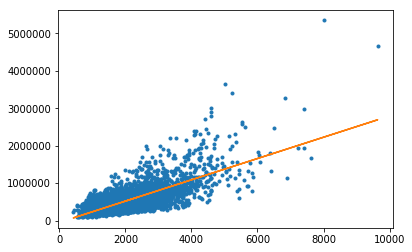

In [84]:
plt.plot(X_test,y_test,'.',
         X_test,pred,'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [85]:
print ('intercept',simple_model.intercept_)
print ('coefficients',simple_model.coef_)

intercept [-50241.54352819]
coefficients [[284.35587906]]


# Explore other features in the data

In [86]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [87]:
sales[my_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074


# Build a regression model with more features

In [89]:
X_train_my_features = train_data[my_features]
y_train_my_features = train_data['price']

In [90]:
my_features_model = regr.fit(x_train_my_features, y_train_my_features)

In [91]:
X_test_my_features = test_data[my_features]
y_test_my_features = test_data['price']

In [93]:
y_my_feature_prd = my_features_model.predict(X_test_my_features)

## Comparing the results of the simple model with adding more features

In [95]:
print("RMSE of simple model: %.2f"
      % math.sqrt(mean_squared_error(y_test, pred)))
print("RMSE of my feature model: %.2f"
      % math.sqrt(mean_squared_error(y_test_my_features, y_my_feature_prd)))

RMSE of simple model: 246408.23
RMSE of my feature model: 241021.40


# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [97]:
house1 = sales[sales['id']==5309101200]

In [98]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [100]:
print (house1['price'])

1054    620000
Name: price, dtype: int64


In [115]:
house1['sqft_living'].shape

(1,)

In [116]:
X_new=house1['sqft_living'].values.reshape(-1,1)

In [118]:
X_new

array([[2400]])

In [131]:
print(simple_model.predict(X_new))

[[632212.56621334]]


In [129]:
print (my_features_model.predict(house1[my_features]))

[635126.47003265]


## Prediction for a second, fancier house

In [132]:
house2 = sales[sales['id']==1925069082]

In [133]:
print (house2['price'])

1361    2200000
Name: price, dtype: int64


In [134]:
X_new2=house2['sqft_living'].values.reshape(-1,1)

In [135]:
print(simple_model.predict(X_new2))

[[1269169.73530543]]


In [136]:
print (my_features_model.predict(house2[my_features]))

[1274383.15319618]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

In [137]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [139]:
bill_gates_df = pd.DataFrame(bill_gates)
bill_gates_df[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,8,25,50000,225000,4,98039


In [140]:
print (my_features_model.predict(bill_gates_df[my_features]))

[15833732.43941702]


# Question 1

In [141]:
sales[sales['zipcode']==98039]['price'].mean()

2160606.6

# Question 2

In [142]:
sales['id'][(sales['sqft_living']>2000)&(sales['sqft_living']<4000)].count()/float(sales['id'].count())

0.4215518437977143

# Question 3

In [190]:
advanced_features =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
                    'condition', # condition of house
                    'grade', # measure of quality of construction
                    'waterfront', # waterfront property
                    'view', # type of view
                    'sqft_above', # square feet above ground
                    'sqft_basement', # square feet in basement
                    'yr_built', # the year built
                    'yr_renovated', # the year renovated
                    'lat', 'long', # the lat-long of the parcel
                    'sqft_living15', # average sq.ft. of 15 nearest neighbors
                    'sqft_lot15', # average lot size of 15 nearest neighbors
                   ]

In [186]:
X_train_advanced = train_data[advanced_features]
y_train_advanced = train_data['price'].values.reshape(-1,1)

In [187]:
advanced_model = regr.fit(X_train_advanced, y_train_advanced)

In [191]:
X_test_advanced = test_data[advanced_features]
y_test_advanced = test_data['price'].values.reshape(-1,1)

In [192]:
y_test_advanced_pred = advanced_model.predict(X_test_advanced)

In [195]:
print("RMSE of advanced model: %.2f"
      % math.sqrt(mean_squared_error(y_test_advanced, y_test_advanced_pred)))

RMSE of advanced model: 213654.32
